# Information

## CC25_C_min


This code uses:
+ Cleaner_Centroid with 2 points
+ Then uses the centroid to compare distance between ['Client_Mouth', 'Client_S1', 'Client_S2', 'Client_Tail', 'Client_TailTip'] points, and calculates the distance.


In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from scipy import stats  # For mode calculation

In [2]:
def detect_interactions(distances, min_consecutive=40, threshold=150):
    """
    Detect interactions in a sequence of distances.

    Parameters:
        distances (list or numpy array): A sequence of distances.
        min_consecutive (int): Minimum consecutive frames required for an interaction.
        threshold (float): Threshold value to determine an interaction.

    Returns:
        List of tuples where each tuple represents an interaction (start_frame, end_frame).
    """
    interactions = []
    current_start = None

    for i, distance in enumerate(distances):
        if distance < threshold:
            if current_start is None:
                current_start = i
        else:
            if current_start is not None:
                if i - current_start >= min_consecutive:
                    interactions.append((current_start, i - 1))
                current_start = None

    # Check if an interaction is ongoing at the end of the sequence
    if current_start is not None and len(distances) - current_start >= min_consecutive:
        interactions.append((current_start, len(distances) - 1))

    return interactions

In [4]:
directory = r"C:\Users\raulo\Desktop\ze_vids\phase_3\Tracks+Label_Top&Bot"
files = os.listdir(directory)

result_dataframes = {}

for file in files:
    df = pd.read_csv(os.path.join(directory, file))
    
    df["Behavior"].replace({"TS": "interaction", "jolts": "interaction"}, inplace=True)
    # Create a new DataFrame to store the results
    new_df = pd.DataFrame()

    # Add relevant data to the new DataFrame
    new_df["Behavior"] = df['Behavior']

    new_df['Client_Mouth_X_top'] = df['Client_Mouth']
    new_df['Client_Mouth_Y_top'] = df['Client_Mouth.1']
    new_df['Client_Mouth_Z_front']= df['Client_Mouth_Front.1']

    new_df['Client_S1_X_top'] = df['Client_Spine_1']
    new_df['Client_S1_Y_top'] = df['Client_Spine_1.1']
    new_df['Client_S1_Z_front']= df['Client_Spine_head_Front.1']

    new_df['Client_S2_X_top'] = df['Client_Spine_2']
    new_df['Client_S2_Y_top'] = df['Client_Spine_2.1']
    new_df['Client_S2_Z_front']= df['Client_Spine_mid_Front.1']

    new_df['Client_Tail_X_top'] = df['Client_Tail']
    new_df['Client_Tail_Y_top'] = df['Client_Tail.1']
    new_df['Client_Tail_Z_front']= df['Client_Tail_Front.1']
    
    new_df['Client_TailTip_X_top'] = df['Client_TailTip']
    new_df['Client_TailTip_Y_top'] = df['Client_TailTip.1']
    new_df['Client_TailTip_Z_front']= df['Client_Tail_Top_Front.1']

    
    
    new_df['Cleaner_Mouth_X_top'] = df['Cleaner_Mouth']
    new_df['Cleaner_Mouth_Y_top'] = df['Cleaner_Mouth.1']
    new_df['Cleaner_Mouth_Z_front']= df['Cleaner_Mouth_Front.1']

    new_df['Cleaner_Spine1_X_top'] = df['Cleaner_Spine1']
    new_df['Cleaner_Spine1_Y_top'] = df['Cleaner_Spine1.1']
    new_df['Cleaner_Spine1_Z_front']= df['Cleaner_Spine1_Front.1']

    

    new_df["Frame"] = df['Frame']
    
    # Create a new column in new_df to store the centroid of the cleaner fish for each row
    new_df['Cleaner_Centroid_X'] = new_df[['Cleaner_Mouth_X_top', 'Cleaner_Spine1_X_top']].mean(axis=1)
    new_df['Cleaner_Centroid_Y'] = new_df[['Cleaner_Mouth_Y_top', 'Cleaner_Spine1_Y_top']].mean(axis=1)
    new_df['Cleaner_Centroid_Z'] = new_df[['Cleaner_Mouth_Z_front', 'Cleaner_Spine1_Z_front']].mean(axis=1)

    # Initialize a column to store the smallest distance for each row
    new_df['Min_Distance'] = np.inf  # Initialize with infinity

    # Loop through client points and calculate distance, updating 'Min_Distance' if a smaller distance is found
    for client_point in ['Client_Mouth', 'Client_S1', 'Client_S2', 'Client_Tail', 'Client_TailTip']:
        client_x = new_df[f'{client_point}_X_top']
        client_y = new_df[f'{client_point}_Y_top']
        client_z = new_df[f'{client_point}_Z_front']

        distance = np.sqrt(
            (client_x - new_df['Cleaner_Centroid_X'])**2 +
            (client_y - new_df['Cleaner_Centroid_Y'])**2 +
            (client_z - new_df['Cleaner_Centroid_Z'])**2
        )

        new_df['Min_Distance'] = np.minimum(new_df['Min_Distance'], distance)
    
    new_df["Interaction_Predictions"] = "background"  # Initialization of predictions

    result_dataframes[file.split("_")[0]] = new_df

## Histograms

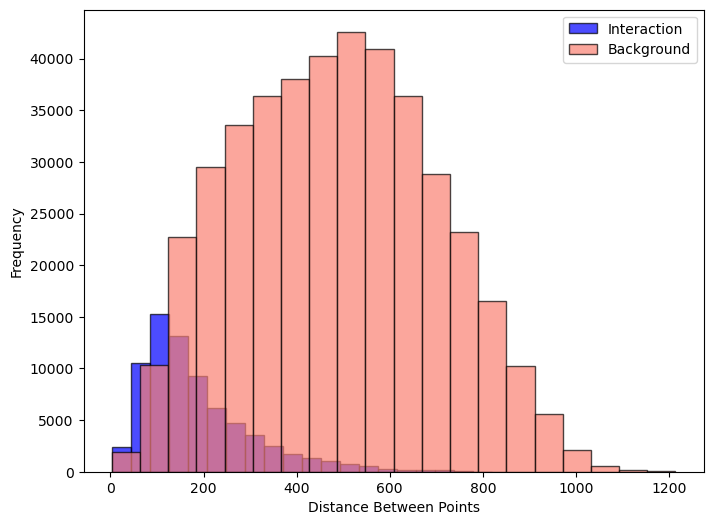

In [5]:
# Concatenate all data frames into one
combined_df = pd.concat(result_dataframes.values())

# Create a figure for the histogram
plt.figure(figsize=(8, 6))

# Plot the histogram for interactions
plt.hist(combined_df[combined_df['Behavior'] == 'interaction']['Min_Distance'], bins=20, edgecolor='black', color='blue', alpha=0.7, label='Interaction')

# Plot the histogram for background behaviors
plt.hist(combined_df[combined_df['Behavior'] == 'Background']['Min_Distance'], bins=20, edgecolor='black', color='salmon', alpha=0.7, label='Background')

# Set labels and title
plt.xlabel('Distance Between Points')
plt.ylabel('Frequency')
plt.title('')
plt.legend()

plt.savefig(r'C:\Users\raulo\Desktop\Faculdade\Mestrado Bioestatística\Tese\Escrita\imagens\histogram_CC2_C5_min.png')

# Show the plot
plt.show()

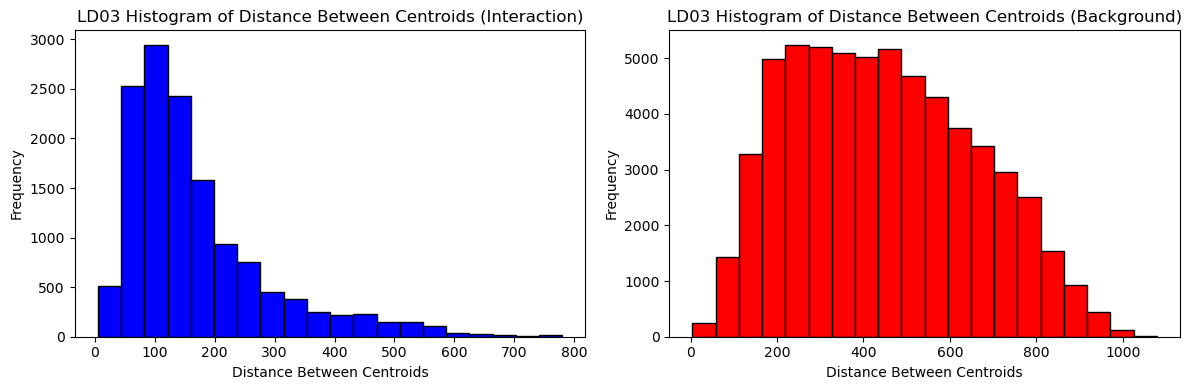

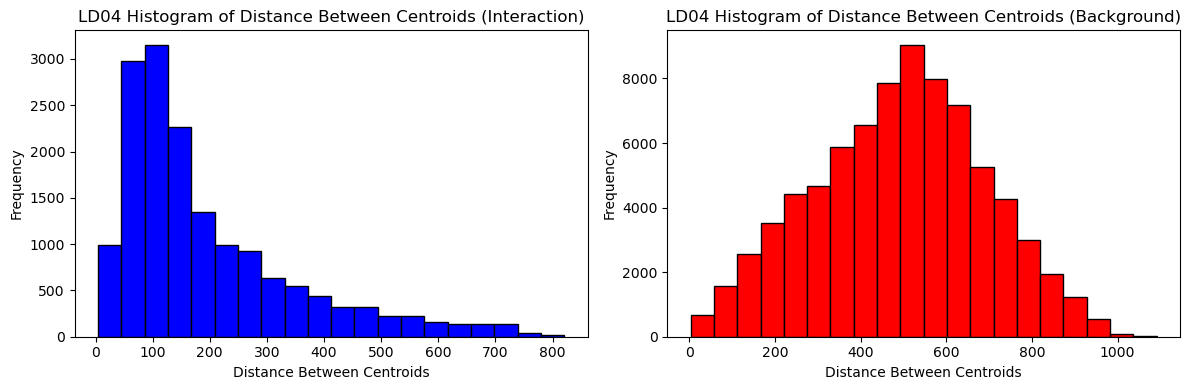

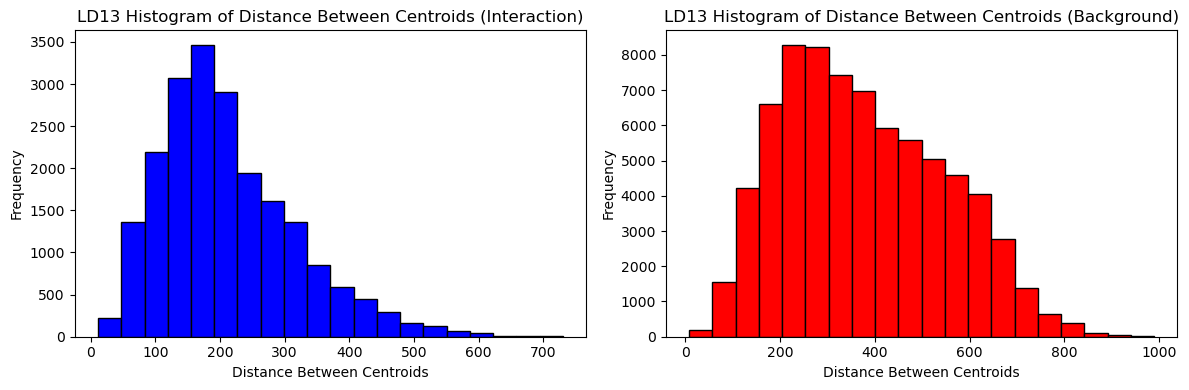

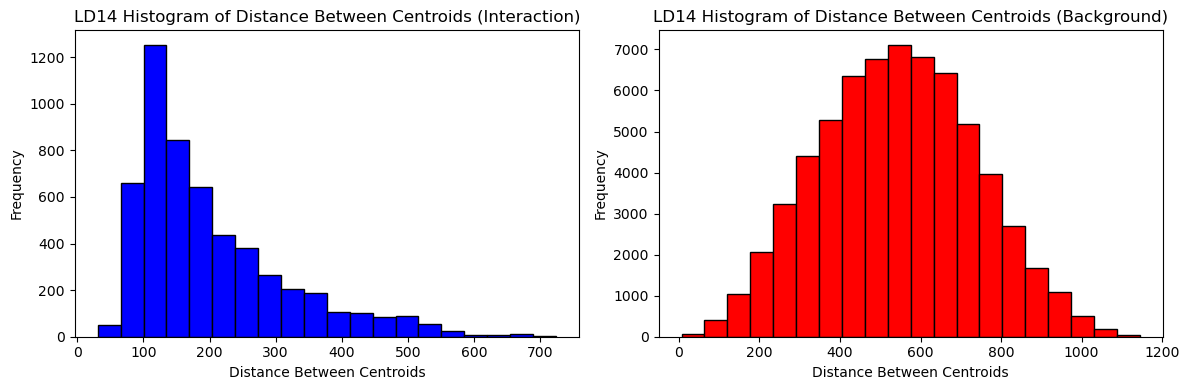

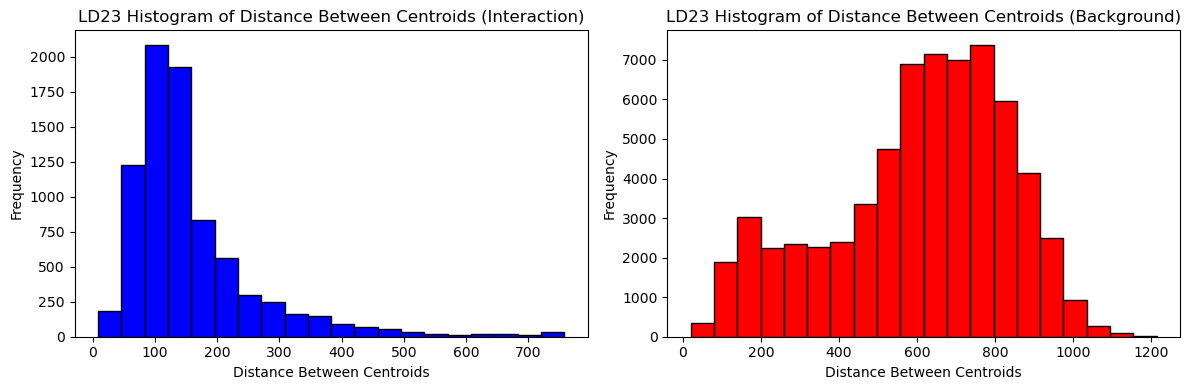

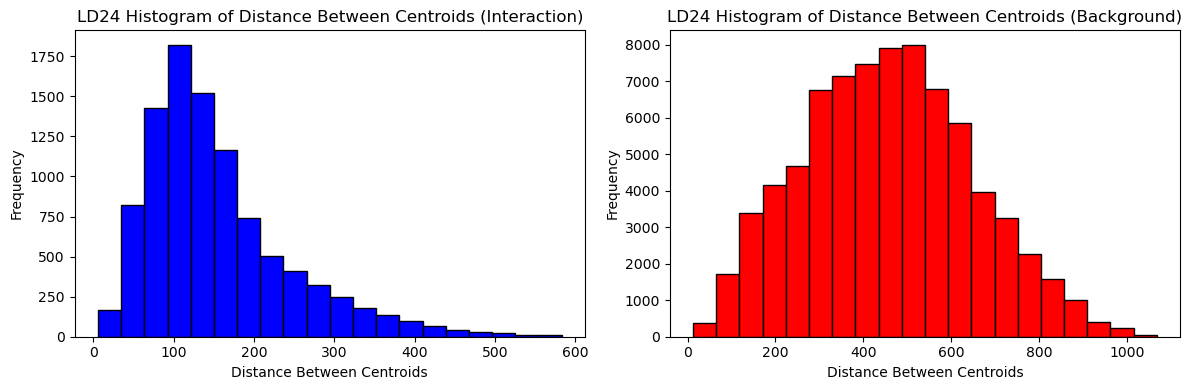

In [4]:
for data_frame in result_dataframes:
    # Create a figure with two subplots side by side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Plot the first histogram (interaction)
    ax1.hist(result_dataframes[data_frame][result_dataframes[data_frame]['Behavior'] == 'interaction']['Min_Distance'], bins=20, edgecolor='black', color='blue')
    ax1.set_xlabel('Distance Between Centroids')
    ax1.set_ylabel('Frequency')
    ax1.set_title(f'{data_frame} Histogram of Distance Between Centroids (Interaction)')

    # Plot the second histogram (non-interaction)
    ax2.hist(result_dataframes[data_frame][result_dataframes[data_frame]['Behavior'] == 'Background']['Min_Distance'], bins=20, edgecolor='black', color='red')
    ax2.set_xlabel('Distance Between Centroids')
    ax2.set_ylabel('Frequency')
    ax2.set_title(f'{data_frame} Histogram of Distance Between Centroids (Background)')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

In [5]:
# Create a dictionary to store summary values for each DataFrame
summary_values = {}

for data_frame in result_dataframes:
    total_frames = 0
    correctly_detected_event = 0
    total = 0
    correctly_frame_count = 0

    interactions = detect_interactions(result_dataframes[data_frame]["Min_Distance"])

    for interaction in interactions:

        start_frame, end_frame = interaction

        if end_frame - start_frame + 1 >= 15:
            total += 1  # Increment the total count for eligible interactions
            total_frames += end_frame - start_frame + 1
            selected_data = result_dataframes[data_frame].loc[start_frame:end_frame, "Behavior"]
            mode_value = stats.mode(selected_data).mode[0]

            if mode_value == "interaction" or mode_value == "TS":
                correctly_detected_event +=1
                correctly_frame_count += end_frame - start_frame + 1

            # Store the prediction in the new column
            result_dataframes[data_frame].loc[start_frame:end_frame, "Interaction_Predictions"] = mode_value
                  
            # Store the summary values in the summary_values dictionary
            summary_values[data_frame] = {
            "total_frames": total_frames,
            "correctly_detected_event": correctly_detected_event,
            "total": total,
            "correctly_frame_count": correctly_frame_count
            }
            
#             if total == 1:
#                 print(f"\nData from: {data_frame}")            
#             print(f"Interaction detected from frame {start_frame} to {end_frame} (Duration: {end_frame - start_frame + 1} frames) with a true Behavior of {mode_value}")

C:\Users\raulo\AppData\Local\Temp\ipykernel_18984\828851113.py:20: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_value = stats.mode(selected_data).mode[0]
C:\Users\raulo\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "
C:\Users\raulo\AppData\Local\Temp\ipykernel_18984\828851113.py:20: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see 

In [6]:
# Define a list of threshold and min_consecutive values to test
threshold_values = [100, 125, 150, 175, 200, 225, 250]  # Add more values if needed
min_consecutive_values = [30, 45, 60]  # Add more values if needed


for threshold in threshold_values:
    for min_consecutive in min_consecutive_values:

        summary_values = {}

        for data_frame_name, data_frame in result_dataframes.items():
            # Initialize variables to keep track of the current group
            current_group = None
            interaction_count = 0

            # Iterate through the "Behavior" column
            for behavior in data_frame["Behavior"]:
                if behavior == "interaction":
                    if current_group != "interaction":
                        # Start of a new interaction group
                        interaction_count += 1
                        current_group = "interaction"
                else:
                    current_group = None  # Reset the group if behavior is not "interaction"

            summary_values[data_frame_name] = {"true interaction count": interaction_count}

            
            # Initialize the summary values with default values
            summary_values[data_frame_name].update({
                "total_frames": 0,
                "correctly_detected_event": 0,
                "total": 0,
                "correctly_frame_count": 0
            })
            
            # Reset the other summary values to zero to avoid overwriting
            total_frames = 0
            correctly_detected_event = 0
            total = 0
            correctly_frame_count = 0

            interactions = detect_interactions(result_dataframes[data_frame_name]["Min_Distance"], min_consecutive, threshold)

            for interaction in interactions:
                start_frame, end_frame = interaction

                if end_frame - start_frame + 1 >= 15:
                    total += 1  # Increment the total count for eligible interactions
                    total_frames += end_frame - start_frame + 1
                    selected_data = result_dataframes[data_frame_name].loc[start_frame:end_frame, "Behavior"]
                    #mode_value = stats.mode(selected_data).mode[0]
                    mode_value = selected_data.mode().iloc[0]
                    
                    if mode_value == "interaction" or mode_value == "TS":
                        correctly_detected_event += 1
                        correctly_frame_count += end_frame - start_frame + 1

                    # Store the prediction in the new column
                    result_dataframes[data_frame_name].loc[start_frame:end_frame, "Interaction_Predictions"] = mode_value

                # Update the existing summary values in the summary_values dictionary
                summary_values[data_frame_name].update({
                "total_frames": total_frames,
                "correctly_detected_event": correctly_detected_event,
                "total": total,
                "correctly_frame_count": correctly_frame_count
                })

        #         if total == 1:
        #             print(f"\nData from: {data_frame_name}")
        #         print(f"Interaction detected from frame {start_frame} to {end_frame} (Duration: {end_frame - start_frame + 1} frames) with a true Behavior of {mode_value}")

        for data_frame, summary in summary_values.items():
            true_interaction_count = summary['true interaction count']
            total_frames = summary['total_frames']
            correctly_frame_count = summary['correctly_frame_count']
            total_detected_events = summary['total']
            correctly_detected_events = summary['correctly_detected_event']

            accuracy = (correctly_frame_count / total_frames) * 100 if total_frames != 0 else 0

            print(f"Data from: {data_frame} with threshold of: {threshold} and min_consecutives of: {min_consecutive}")
            print(f"This data has {true_interaction_count} true events")
            print(f"There were {correctly_frame_count} frames correctly classified, out of a total of {total_frames} frames classified as interaction.")
            print(f"This results in an accuracy of {accuracy:.2f}%.")
            print(f"There were a total of {correctly_detected_events} events detected correctly, out of {total_detected_events} total events detected. ({correctly_detected_events/total_detected_events *100:.2f}%)" 
                 if total_detected_events != 0 else "No events detected.")
            print(f"There was {correctly_detected_events/true_interaction_count * 100:.2f}% events detected")
            print("")

Data from: LD03 with threshold of: 100 and min_consecutives of: 30
This data has 69 true events
There were 3060 frames correctly classified, out of a total of 3435 frames classified as interaction.
This results in an accuracy of 89.08%.
There were a total of 56 events detected correctly, out of 64 total events detected. (87.50%)
There was 81.16% events detected

Data from: LD04 with threshold of: 100 and min_consecutives of: 30
This data has 63 true events
There were 3806 frames correctly classified, out of a total of 4455 frames classified as interaction.
This results in an accuracy of 85.43%.
There were a total of 61 events detected correctly, out of 74 total events detected. (82.43%)
There was 96.83% events detected

Data from: LD13 with threshold of: 100 and min_consecutives of: 30
This data has 81 true events
There were 1246 frames correctly classified, out of a total of 1479 frames classified as interaction.
This results in an accuracy of 84.25%.
There were a total of 25 events d

Data from: LD03 with threshold of: 125 and min_consecutives of: 60
This data has 69 true events
There were 3244 frames correctly classified, out of a total of 3677 frames classified as interaction.
This results in an accuracy of 88.22%.
There were a total of 30 events detected correctly, out of 35 total events detected. (85.71%)
There was 43.48% events detected

Data from: LD04 with threshold of: 125 and min_consecutives of: 60
This data has 63 true events
There were 4207 frames correctly classified, out of a total of 4739 frames classified as interaction.
This results in an accuracy of 88.77%.
There were a total of 41 events detected correctly, out of 48 total events detected. (85.42%)
There was 65.08% events detected

Data from: LD13 with threshold of: 125 and min_consecutives of: 60
This data has 81 true events
There were 1049 frames correctly classified, out of a total of 1113 frames classified as interaction.
This results in an accuracy of 94.25%.
There were a total of 11 events d

Data from: LD03 with threshold of: 175 and min_consecutives of: 45
This data has 69 true events
There were 8289 frames correctly classified, out of a total of 10221 frames classified as interaction.
This results in an accuracy of 81.10%.
There were a total of 70 events detected correctly, out of 95 total events detected. (73.68%)
There was 101.45% events detected

Data from: LD04 with threshold of: 175 and min_consecutives of: 45
This data has 63 true events
There were 8696 frames correctly classified, out of a total of 10586 frames classified as interaction.
This results in an accuracy of 82.15%.
There were a total of 72 events detected correctly, out of 97 total events detected. (74.23%)
There was 114.29% events detected

Data from: LD13 with threshold of: 175 and min_consecutives of: 45
This data has 81 true events
There were 5798 frames correctly classified, out of a total of 9028 frames classified as interaction.
This results in an accuracy of 64.22%.
There were a total of 67 even

Data from: LD03 with threshold of: 200 and min_consecutives of: 60
This data has 69 true events
There were 9844 frames correctly classified, out of a total of 12153 frames classified as interaction.
This results in an accuracy of 81.00%.
There were a total of 63 events detected correctly, out of 87 total events detected. (72.41%)
There was 91.30% events detected

Data from: LD04 with threshold of: 200 and min_consecutives of: 60
This data has 63 true events
There were 9694 frames correctly classified, out of a total of 11732 frames classified as interaction.
This results in an accuracy of 82.63%.
There were a total of 65 events detected correctly, out of 88 total events detected. (73.86%)
There was 103.17% events detected

Data from: LD13 with threshold of: 200 and min_consecutives of: 60
This data has 81 true events
There were 7965 frames correctly classified, out of a total of 11690 frames classified as interaction.
This results in an accuracy of 68.14%.
There were a total of 72 even

Data from: LD03 with threshold of: 250 and min_consecutives of: 30
This data has 69 true events
There were 12361 frames correctly classified, out of a total of 21475 frames classified as interaction.
This results in an accuracy of 57.56%.
There were a total of 74 events detected correctly, out of 213 total events detected. (34.74%)
There was 107.25% events detected

Data from: LD04 with threshold of: 250 and min_consecutives of: 30
This data has 63 true events
There were 12203 frames correctly classified, out of a total of 19352 frames classified as interaction.
This results in an accuracy of 63.06%.
There were a total of 85 events detected correctly, out of 211 total events detected. (40.28%)
There was 134.92% events detected

Data from: LD13 with threshold of: 250 and min_consecutives of: 30
This data has 81 true events
There were 13920 frames correctly classified, out of a total of 30595 frames classified as interaction.
This results in an accuracy of 45.50%.
There were a total of 1

In [7]:
interaction_counts = {}  # Create a dictionary to store interaction counts for each DataFrame

for data_frame_name, data_frame in result_dataframes.items():
    # Initialize variables to keep track of the current group
    current_group = None
    interaction_count = 0

    # Iterate through the "Behavior" column
    for behavior in data_frame["Behavior"]:
        if behavior == "interaction":
            if current_group != "interaction":
                # Start of a new interaction group
                interaction_count += 1
                current_group = "interaction"
        else:
            current_group = None  # Reset the group if behavior is not "interaction"

    interaction_counts[data_frame_name] = interaction_count

interaction_counts_60 = {}  # Create a dictionary to store interaction counts for each DataFrame

for data_frame_name, data_frame in result_dataframes.items():
    # Initialize variables to keep track of the current group
    current_group = None
    interaction_count = 0
    current_group_count = 0

    # Iterate through the "Behavior" column
    for behavior in data_frame["Behavior"]:
        if behavior == "interaction":
            if current_group != "interaction":
                # Start of a new interaction group
                current_group_count = 1
                current_group = "interaction"
            else:
                current_group_count += 1
        else:
            if current_group_count >= 60:
                interaction_count += 1
            current_group = None  # Reset the group if behavior is not "interaction"
            current_group_count = 0

    # Check if the last group, if any, was an "interaction" group and met the condition
    if current_group_count > 90:
        interaction_count += 1

    interaction_counts_60[data_frame_name] = interaction_count
    
print("all",interaction_counts)
print("+60",interaction_counts_60)

all {'LD03': 69, 'LD04': 63, 'LD13': 81, 'LD14': 34, 'LD23': 30, 'LD24': 50}
+60 {'LD03': 64, 'LD04': 57, 'LD13': 67, 'LD14': 29, 'LD23': 25, 'LD24': 42}


## Predicted Correct Events

In [8]:
# Define a list of threshold and min_consecutive values to test
threshold_values = [100, 125, 150, 175, 200, 225, 250]  # Add more values if needed
min_consecutive_values = [30, 45, 60]  # Add more values if needed

# Iterate through all data frames
for data_frame_name, data_frame in result_dataframes.items():
    # Initialize a nested dictionary to store correctly detected events
    correctly_detected_events = {}

    # Loop through threshold and min_consecutive values
    for threshold in threshold_values:
        correctly_detected_events[threshold] = {}  # Initialize inner dictionary
        for min_consecutive in min_consecutive_values:
            summary_values = {}

            # Initialize variables to keep track of the current group
            current_group = None
            interaction_count = 0

            # Iterate through the "Behavior" column
            for behavior in data_frame["Behavior"]:
                if behavior == "interaction":
                    if current_group != "interaction":
                        # Start of a new interaction group
                        interaction_count += 1
                        current_group = "interaction"
                else:
                    current_group = None  # Reset the group if behavior is not "interaction"

            summary_values[data_frame_name] = {"true interaction count": interaction_count}

            # Reset the other summary values to zero to avoid overwriting
            total_frames = 0
            correctly_detected_event = 0
            total = 0
            correctly_frame_count = 0

            interactions = detect_interactions(data_frame["Min_Distance"], min_consecutive, threshold)

            for interaction in interactions:
                start_frame, end_frame = interaction

                if end_frame - start_frame + 1 >= 15:
                    total += 1  # Increment the total count for eligible interactions
                    total_frames += end_frame - start_frame + 1
                    selected_data = data_frame.loc[start_frame:end_frame, "Behavior"]
                    mode_value = selected_data.mode().iloc[0]

                    if mode_value == "interaction" or mode_value == "TS":
                        correctly_detected_event += 1
                        correctly_frame_count += end_frame - start_frame + 1

                    # Store the prediction in the new column
                    data_frame.loc[start_frame:end_frame, "Interaction_Predictions"] = mode_value

                # Update the existing summary values in the summary_values dictionary
                summary_values[data_frame_name].update({
                    "total_frames": total_frames,
                    "correctly_detected_event": correctly_detected_event,
                    "total": total,
                    "correctly_frame_count": correctly_frame_count
                })

            correctly_detected_events[threshold][min_consecutive] = correctly_detected_event
    print(f"Data Frame: {data_frame_name}. With a total of: {interaction_count} events")  # Add a header for the data frame
    
    # Now, display the table for the current data frame
    print("\t" + "\t".join(map(str, threshold_values)))  # Print column headers
    for min_consecutive in min_consecutive_values:
        row_values = [str(min_consecutive)]  # Start the row with min_consecutive value
        for threshold in threshold_values:
            cell_value = correctly_detected_events[threshold][min_consecutive]
            row_values.append(str(cell_value))
        print("\t".join(row_values))

    # Add a line to separate data frames
    print("-" * 60)

Data Frame: LD03. With a total of: 69 events
	100	125	150	175	200	225	250
30	56	72	79	81	77	73	74
45	25	46	66	70	67	71	69
60	16	30	45	60	63	61	63
------------------------------------------------------------
Data Frame: LD04. With a total of: 63 events
	100	125	150	175	200	225	250
30	61	82	82	86	84	85	85
45	36	56	68	72	73	73	74
60	18	41	53	59	65	66	69
------------------------------------------------------------
Data Frame: LD13. With a total of: 81 events
	100	125	150	175	200	225	250
30	25	46	72	106	124	129	123
45	9	23	43	67	91	107	102
60	4	11	28	43	72	81	89
------------------------------------------------------------
Data Frame: LD14. With a total of: 34 events
	100	125	150	175	200	225	250
30	5	17	26	31	35	37	38
45	3	12	21	25	29	30	32
60	0	8	13	17	22	23	26
------------------------------------------------------------
Data Frame: LD23. With a total of: 30 events
	100	125	150	175	200	225	250
30	25	46	47	38	36	37	33
45	13	29	40	36	34	35	31
60	6	21	31	31	32	32	28
---------------------------

## Number of wrong Events wrongly detected

In [9]:
# Define a list of threshold and min_consecutive values to test
threshold_values = [100, 125, 150, 175, 200, 225, 250]  # Add more values if needed
min_consecutive_values = [30, 45, 60]  # Add more values if needed

# Iterate through all data frames
for data_frame_name, data_frame in result_dataframes.items():
    print(f"Data Frame: {data_frame_name}")  # Add a header for the data frame

    # Initialize a nested dictionary to store correctly detected events
    correctly_detected_events = {}

    # Loop through threshold and min_consecutive values
    for threshold in threshold_values:
        correctly_detected_events[threshold] = {}  # Initialize inner dictionary
        for min_consecutive in min_consecutive_values:
            summary_values = {}

            # Initialize variables to keep track of the current group
            current_group = None
            interaction_count = 0

            # Iterate through the "Behavior" column
            for behavior in data_frame["Behavior"]:
                if behavior == "interaction":
                    if current_group != "interaction":
                        # Start of a new interaction group
                        interaction_count += 1
                        current_group = "interaction"
                else:
                    current_group = None  # Reset the group if behavior is not "interaction"

            summary_values[data_frame_name] = {"true interaction count": interaction_count}
            
            # Initialize the summary values with default values
            summary_values[data_frame_name].update({
                "total_frames": 0,
                "correctly_detected_event": 0,
                "total": 0,
                "correctly_frame_count": 0,
                "total_detected_events": 0,
                "wrongly_detected_event": 0
            })

            # Reset the other summary values to zero to avoid overwriting
            total_frames = 0
            correctly_detected_event = 0
            total = 0
            correctly_frame_count = 0
            wrongly_detected_event = 0
            wrongly_detected_frames = 0

            interactions = detect_interactions(data_frame["Min_Distance"], min_consecutive, threshold)

            for interaction in interactions:
                start_frame, end_frame = interaction

                if end_frame - start_frame + 1 >= 15:
                    total += 1  # Increment the total count for eligible interactions
                    total_frames += end_frame - start_frame + 1
                    selected_data = data_frame.loc[start_frame:end_frame, "Behavior"]
                    mode_value = selected_data.mode().iloc[0]

                    if mode_value == "interaction" or mode_value == "TS":
                        correctly_detected_event += 1
                        correctly_frame_count += end_frame - start_frame + 1
                        
                    else:
                        wrongly_detected_event += 1
                        wrongly_detected_frames += end_frame - start_frame + 1
                        
                    # Store the prediction in the new column
                    data_frame.loc[start_frame:end_frame, "Interaction_Predictions"] = mode_value

                # Update the existing summary values in the summary_values dictionary
                summary_values[data_frame_name].update({
                    "total_frames": total_frames,
                    "correctly_detected_event": correctly_detected_event,
                    "total_detected_events": total,
                    "correctly_frame_count": correctly_frame_count,
                    "wrongly_detected_event": wrongly_detected_event,
                    "wrongly_detected_frames": wrongly_detected_frames
                })

            correctly_detected_events[threshold][min_consecutive] = summary_values[data_frame_name]["wrongly_detected_event"]  # Calculate and store the ratio

    # Now, display the table for the current data frame
    print("\t" + "\t".join(map(str, threshold_values)))  # Print column headers
    for min_consecutive in min_consecutive_values:
        row_values = [str(min_consecutive)]  # Start the row with min_consecutive value
        for threshold in threshold_values:
            cell_value = correctly_detected_events[threshold][min_consecutive]
            row_values.append(f"{cell_value}")  # Format as percentage
        print("\t".join(row_values))

    # Add a line to separate data frames
    print("-" * 60)

Data Frame: LD03
	100	125	150	175	200	225	250
30	8	14	33	59	86	111	139
45	3	8	13	25	39	62	83
60	1	5	8	16	24	40	54
------------------------------------------------------------
Data Frame: LD04
	100	125	150	175	200	225	250
30	13	20	32	49	63	84	126
45	7	11	16	25	35	51	60
60	3	7	8	18	23	28	39
------------------------------------------------------------
Data Frame: LD13
	100	125	150	175	200	225	250
30	6	21	53	110	170	196	230
45	1	6	14	53	95	128	154
60	0	1	6	23	44	77	105
------------------------------------------------------------
Data Frame: LD14
	100	125	150	175	200	225	250
30	0	1	2	4	13	24	39
45	0	0	1	1	1	7	14
60	0	0	0	1	1	1	2
------------------------------------------------------------
Data Frame: LD23
	100	125	150	175	200	225	250
30	4	13	24	32	31	30	37
45	3	9	14	23	21	21	25
60	3	5	10	17	17	12	18
------------------------------------------------------------
Data Frame: LD24
	100	125	150	175	200	225	250
30	4	13	45	70	100	117	133
45	1	5	16	33	52	74	92
60	1	1	6	13	28	46	57
------------------

## Number of correct frames

In [10]:
# Define a list of threshold and min_consecutive values to test
threshold_values = [100, 125, 150, 175, 200, 225, 250]  # Add more values if needed
min_consecutive_values = [30, 45, 60]  # Add more values if needed

# Iterate through all data frames
for data_frame_name, data_frame in result_dataframes.items():
    # Initialize a nested dictionary to store correctly detected frames
    correctly_detected_frames = {}

    # Loop through threshold and min_consecutive values
    for threshold in threshold_values:
        correctly_detected_frames[threshold] = {}  # Initialize inner dictionary
        for min_consecutive in min_consecutive_values:
            summary_values = {}

            # Initialize variables to keep track of the current group
            current_group = None
            interaction_count = 0

            # Iterate through the "Behavior" column
            for behavior in data_frame["Behavior"]:
                if behavior == "interaction":
                    if current_group != "interaction":
                        # Start of a new interaction group
                        interaction_count += 1
                        current_group = "interaction"
                else:
                    current_group = None  # Reset the group if behavior is not "interaction"

            summary_values[data_frame_name] = {"true interaction count": interaction_count}

            # Reset the other summary values to zero to avoid overwriting
            total_frames = 0
            correctly_detected_frames_count = 0  # Updated variable name
            total = 0
            correctly_frame_count = 0

            interactions = detect_interactions(data_frame["Min_Distance"], min_consecutive, threshold)

            for interaction in interactions:
                start_frame, end_frame = interaction

                if end_frame - start_frame + 1 >= 15:
                    total += 1  # Increment the total count for eligible interactions
                    total_frames += end_frame - start_frame + 1
                    selected_data = data_frame.loc[start_frame:end_frame, "Behavior"]
                    mode_value = selected_data.mode().iloc[0]

                    if mode_value == "interaction" or mode_value == "TS":
                        correctly_detected_frames_count += end_frame - start_frame + 1  # Updated variable name

                    # Store the prediction in the new column
                    data_frame.loc[start_frame:end_frame, "Interaction_Predictions"] = mode_value

                # Update the existing summary values in the summary_values dictionary
                summary_values[data_frame_name].update({
                    "total_frames": total_frames,
                    "correctly_detected_frames_count": correctly_detected_frames_count,  # Updated variable name
                    "total": total,
                    "correctly_frame_count": correctly_frame_count
                })

            correctly_detected_frames[threshold][min_consecutive] = correctly_detected_frames_count  # Updated variable name
    print(f"Data Frame: {data_frame_name}. With a total of: {data_frame['Behavior'].value_counts().get('interaction', 0)} frames")  # Add a header for the data frame

    # Now, display the table for the current data frame
    print("\t" + "\t".join(map(str, threshold_values)))  # Print column headers
    for min_consecutive in min_consecutive_values:
        row_values = [str(min_consecutive)]  # Start the row with min_consecutive value
        for threshold in threshold_values:
            cell_value = correctly_detected_frames[threshold][min_consecutive]  # Updated variable name
            row_values.append(str(cell_value))
        print("\t".join(row_values))

    # Add a line to separate data frames
    print("-" * 60)

Data Frame: LD03. With a total of: 13729 frames
	100	125	150	175	200	225	250
30	3060	5051	6933	8668	10441	11546	12361
45	1936	4057	6430	8289	10053	11464	12178
60	1466	3244	5326	7747	9844	10952	11868
------------------------------------------------------------
Data Frame: LD04. With a total of: 15986 frames
	100	125	150	175	200	225	250
30	3806	5931	7911	9187	10501	11261	12203
45	2900	4989	7387	8696	10126	10819	11790
60	1978	4207	6624	8028	9694	10427	11527
------------------------------------------------------------
Data Frame: LD13. With a total of: 20744 frames
	100	125	150	175	200	225	250
30	1246	2526	4500	7242	10179	12648	13920
45	655	1679	3467	5798	8953	11879	13130
60	394	1049	2694	4559	7965	10552	12456
------------------------------------------------------------
Data Frame: LD14. With a total of: 5423 frames
	100	125	150	175	200	225	250
30	220	1128	2064	2697	3287	3942	4352
45	151	946	1870	2457	3065	3688	4120
60	0	742	1450	2025	2712	3320	3800
----------------------------------------

## Number of wrong frames predicted

In [11]:
# Define a list of threshold and min_consecutive values to test
threshold_values = [100, 125, 150, 175, 200, 225, 250]  # Add more values if needed
min_consecutive_values = [30, 45, 60]  # Add more values if needed

# Iterate through all data frames
for data_frame_name, data_frame in result_dataframes.items():
    # Initialize a nested dictionary to store incorrectly detected frames
    incorrectly_detected_frames = {}

    # Loop through threshold and min_consecutive values
    for threshold in threshold_values:
        incorrectly_detected_frames[threshold] = {}  # Initialize inner dictionary
        for min_consecutive in min_consecutive_values:
            summary_values = {}

            # Initialize variables to keep track of the current group
            current_group = None
            interaction_count = 0

            # Iterate through the "Behavior" column
            for behavior in data_frame["Behavior"]:
                if behavior == "interaction":
                    if current_group != "interaction":
                        # Start of a new interaction group
                        interaction_count += 1
                        current_group = "interaction"
                else:
                    current_group = None  # Reset the group if behavior is not "interaction"

            summary_values[data_frame_name] = {"true interaction count": interaction_count}

            # Reset the other summary values to zero to avoid overwriting
            total_frames = 0
            correctly_detected_frames_count = 0
            incorrectly_detected_frames_count = 0  # Updated variable name
            total = 0
            correctly_frame_count = 0

            interactions = detect_interactions(data_frame["Min_Distance"], min_consecutive, threshold)

            for interaction in interactions:
                start_frame, end_frame = interaction

                if end_frame - start_frame + 1 >= 15:
                    total += 1  # Increment the total count for eligible interactions
                    total_frames += end_frame - start_frame + 1
                    selected_data = data_frame.loc[start_frame:end_frame, "Behavior"]
                    mode_value = selected_data.mode().iloc[0]

                    if mode_value == "interaction" or mode_value == "TS":
                        correctly_detected_frames_count += end_frame - start_frame + 1
                    else:
                        incorrectly_detected_frames_count += end_frame - start_frame + 1

                    # Store the prediction in the new column
                    data_frame.loc[start_frame:end_frame, "Interaction_Predictions"] = mode_value

                # Update the existing summary values in the summary_values dictionary
                summary_values[data_frame_name].update({
                    "total_frames": total_frames,
                    "correctly_detected_frames_count": correctly_detected_frames_count,
                    "incorrectly_detected_frames_count": incorrectly_detected_frames_count,  # Updated variable name
                    "total": total,
                    "correctly_frame_count": correctly_frame_count
                })

            incorrectly_detected_frames[threshold][min_consecutive] = incorrectly_detected_frames_count  # Updated variable name
    print(f"Data Frame: {data_frame_name}. With a total of: {data_frame['Behavior'].value_counts().get('interaction', 0)} frames")  # Add a header for the data frame

    # Now, display the table for the current data frame
    print("\t" + "\t".join(map(str, threshold_values)))  # Print column headers
    for min_consecutive in min_consecutive_values:
        row_values = [str(min_consecutive)]  # Start the row with min_consecutive value
        for threshold in threshold_values:
            cell_value = incorrectly_detected_frames[threshold][min_consecutive]  # Updated variable name
            row_values.append(str(cell_value))
        print("\t".join(row_values))

    # Add a line to separate data frames
    print("-" * 60)

Data Frame: LD03. With a total of: 13729 frames
	100	125	150	175	200	225	250
30	375	800	1691	3139	4784	6744	9114
45	196	577	989	1932	3083	4987	7066
60	93	433	729	1466	2309	3893	5586
------------------------------------------------------------
Data Frame: LD04. With a total of: 15986 frames
	100	125	150	175	200	225	250
30	649	1032	1635	2773	3664	4970	7149
45	430	727	1072	1890	2659	3785	4784
60	221	532	659	1532	2038	2601	3702
------------------------------------------------------------
Data Frame: LD13. With a total of: 20744 frames
	100	125	150	175	200	225	250
30	233	827	2306	5271	9058	12285	16675
45	50	311	894	3230	6361	9816	13881
60	0	64	468	1745	3725	7169	11300
------------------------------------------------------------
Data Frame: LD14. With a total of: 5423 frames
	100	125	150	175	200	225	250
30	0	30	93	172	506	982	1706
45	0	0	57	66	81	389	825
60	0	0	0	66	81	92	196
------------------------------------------------------------
Data Frame: LD23. With a total of: 8044 frames
	100	125	

#### Creates a dict with predicted | true labels for all dataframes with all param combinations

In [12]:
# Define a list of threshold and min_consecutive values to test
threshold_values = [100, 125, 150, 175, 200, 225, 250]
min_consecutive_values = [30, 45, 60]

# Initialize a dictionary to store results for each combination
results_dict = {}

# Iterate through all data frames
for data_frame_name, data_frame in result_dataframes.items():
    # Initialize a nested dictionary for the current data frame
    data_frame_results = {}

    # Loop through threshold and min_consecutive values
    for threshold in threshold_values:
        for min_consecutive in min_consecutive_values:
            interactions = detect_interactions(data_frame["Min_Distance"], min_consecutive, threshold)

            # Initialize an empty DataFrame to store "Behavior" and "Interaction_Predictions" columns
            selected_data = pd.DataFrame(columns=["Behavior", "Interaction_Predictions"])
            selected_data["Behavior"] = data_frame["Behavior"]
            selected_data["Interaction_Predictions"] = "background"

            for interaction in interactions:
                start_frame, end_frame = interaction

                if end_frame - start_frame + 1 >= 15:
                    selected_data.loc[start_frame:end_frame, "Interaction_Predictions"] = "interaction"

            # Store the selected data in the data frame results
            data_frame_results[(threshold, min_consecutive)] = selected_data

    # Store the data frame results in the overall results dictionary
    results_dict[data_frame_name] = data_frame_results

In [13]:
# Specify the folder where you want to save the CSV files
output_folder = r"C:\Users\raulo\Desktop\ze_vids\phase_3\results_dataframes\CleanerCentroid2_Client5_smaller"

# Save the results to CSV files
for data_frame_name, data_frame_results in results_dict.items():
    for (threshold, min_consecutive), selected_data in data_frame_results.items():
        # Generate a filename based on the data frame name, threshold, and min_consecutive values
        filename = f"{data_frame_name}_threshold{threshold}_minc{min_consecutive}.csv"

        # Create the full path by joining the output folder and filename
        full_path = os.path.join(output_folder, filename)

        # Save the selected data to CSV
        selected_data.to_csv(full_path, index=False)